In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.optim as optim


import torch.nn as nn
import torch.nn.functional as F #is like a set of class methods i think

In [2]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
test = train = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)



In [5]:
for data in trainset:
    print(data)
    break
    

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

torch.Size([10, 1, 28, 28])

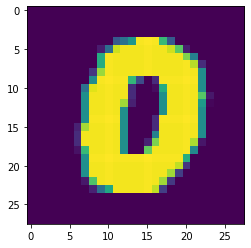

In [6]:
x, y = data[0][0], data[1][0]

plt.imshow(x.view(28, 28))
#plt.show()
data[0].shape


In [7]:
#datasets should be balanced
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1;
        
print(counter_dict)

{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #this doesn't happen by default? strange
        self.fc1 = nn.Linear((28*28), 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
                         
        return F.log_softmax(x, dim=1)
    
    
    
            
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [16]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [10]:
output = net(X)
output

tensor([[-2.3567, -2.3688, -2.3642, -2.2908, -2.2948, -2.3092, -2.3710, -2.2625,
         -2.1430, -2.2873]], grad_fn=<LogSoftmaxBackward>)

In [11]:
data[0].shape

torch.Size([10, 1, 28, 28])

In [12]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        #print(y[0])
        net.zero_grad()
        #break
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.3325, grad_fn=<NllLossBackward>)
tensor(0.0135, grad_fn=<NllLossBackward>)
tensor(0.0577, grad_fn=<NllLossBackward>)


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))
    

Accuracy:  0.973


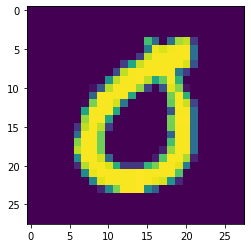

In [14]:
plt.imshow(X[0].view(28,28))
plt.show()

In [15]:
print(torch.argmax(net(X[0].view(-1, 784))))

tensor(0, grad_fn=<NotImplemented>)
